In [1]:
%matplotlib inline

In [473]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

In [474]:
def flip_a_coin():
    x = random.choice(['heads', 'tails'])
    return x

In [475]:
flip_a_coin()

'heads'

In [476]:
def simulate_base_2_flip(n=2**16):
    heads = 0
    tails = 0

    heads_check = []
    tails_check = []

    max_exp = math.log2(n)
    exp = 0
    count = 1
    
    while count < n:
        result = flip_a_coin()
        if result == 'heads':
            heads += 1
        else:
            tails += 1

        if count == 2**exp:
            heads_check.append(heads)
            tails_check.append(tails)
            exp += 1
            
        count +=1
    
    heads_check.append(heads)
    tails_check.append(tails)
    
    return heads_check, tails_check

In [477]:
heads, tails = simulate_base_2_flip()

In [478]:
distance_between = [a - b for a, b in zip(heads, tails)]
print(distance_between)

[-1, -2, -2, -6, -6, -4, -10, -26, -28, -16, -48, -46, -36, -106, -120, -464, -369]


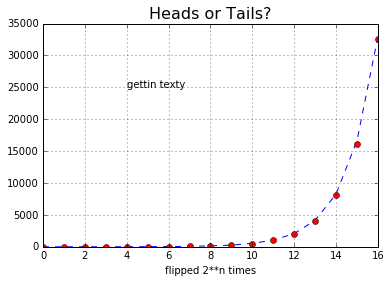

In [479]:
plt.plot(tails, 'b--')
plt.plot(heads, 'ro')
plt.title('Heads or Tails?', fontsize = 16)
plt.xlabel('flipped 2**n times')
plt.grid(True)
plt.text(4, 25000, r'gettin texty')

In [480]:
x1 = [2**n for n in range(17)]

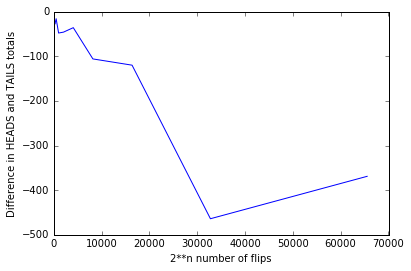

In [481]:
plt.plot(x1, distance_between)
plt.xlabel('2**n number of flips')
plt.ylabel('Difference in HEADS and TAILS totals')
plt.show()

In [482]:
def ratio(list_a):
    ratios = []
    for index, a in enumerate(list_a):
        b = (2**index) - a

        if b == 0:
            ratios.append(10)
        else:
            ratios.append(a / b)
    return ratios

ratio_h_to_t = ratio(heads)

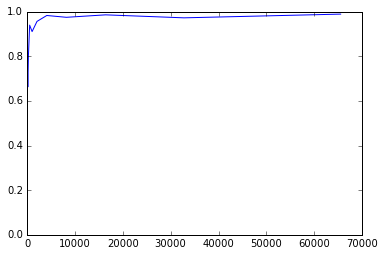

In [483]:
plt.plot(x1, ratio_h_to_t)
plt.show()

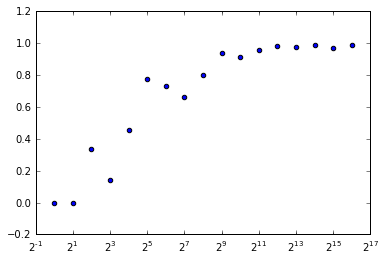

In [484]:
plt.scatter(x1, ratio_h_to_t)
plt.xscale('log', basex=2)

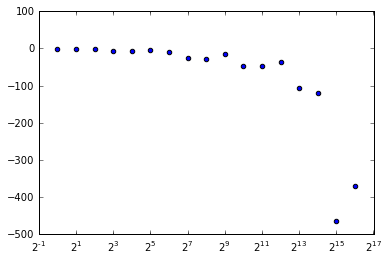

In [485]:
plt.scatter(x1, distance_between)
plt.xscale('log', basex=2)

In [490]:
ratios_by_point = {key: [] for key in x1}

for _ in range(20):
    heads, tails = simulate_base_2_flip()
    
    for i, value in enumerate(heads):
        ratios_by_point[x1[i]].append(heads[i])

for key in heads_by_point:
    ratios_by_point[key] = ratio(ratios_by_point[key])

In [491]:
means = []
for key in sorted(list(ratios_by_point.keys())):
    means.append(st.mean(ratios_by_point[key]))

st_devs = []
for key in sorted(list(ratios_by_point.keys())):
    st_devs.append(st.stdev(ratios_by_point[key]))

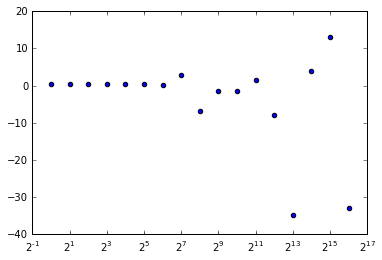

In [492]:
plt.scatter(sorted(list(ratios_by_point.keys())), means)
plt.xscale('log', basex=2)

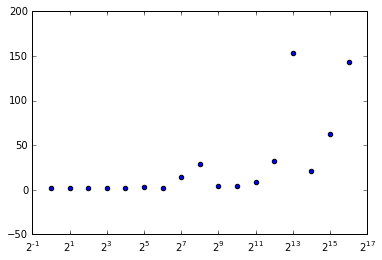

In [493]:
plt.scatter(sorted(list(ratios_by_point.keys())), st_devs)
plt.xscale('log', basex=2)

In [498]:
def simulate_flips(n):
    heads = 0
    
    for _ in range(n):
        result = flip_a_coin()
        if result == 'heads':
            heads += 1
    
    tails = n - heads
    return heads

print(simulate_flips(100))

49
